# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [3]:
adult_income = pd.read_csv('adult.csv')
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<font color=red> the workclass and occupation have question mark '?'...

In [4]:
adult_income.shape

(48842, 15)

In [5]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
adult_income.income.unique()

array(['<=50K', '>50K'], dtype=object)

<font color=red> this is a binary classification problem.

In [11]:
adult_income[adult_income.workclass=='?'].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K


<font color=red> is all rows with '?' in worklclass also have '?' in occupation????

In [15]:
adult_income[adult_income.workclass=='?'].shape, adult_income[adult_income.occupation=='?'].shape

((2799, 15), (2809, 15))

<font color=red> more rows with '?' in occupation, check these 10 rows

In [19]:
adult_income[(adult_income.occupation=='?')&(adult_income.workclass!='?')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


<font color=red> i see, for these 10 rows, the workclass is Never-worked, so definitely the occupation should be 'No-occupation'

In [20]:
adult_income.loc[adult_income.workclass=='Never-worked', 'occupation'] = 'No occupation'

<font color=red> for rows with '?' in both workclass and occupation, set them to 'Unknown'. 

In [22]:
adult_income.loc[adult_income.workclass=='?', 'workclass'] = 'Unknown'
adult_income.loc[adult_income.occupation=='?', 'occupation'] = 'Unknown'

In [23]:
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
adult_income.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# EDA

## <font color=red> Q: Can I make a scatterplot?

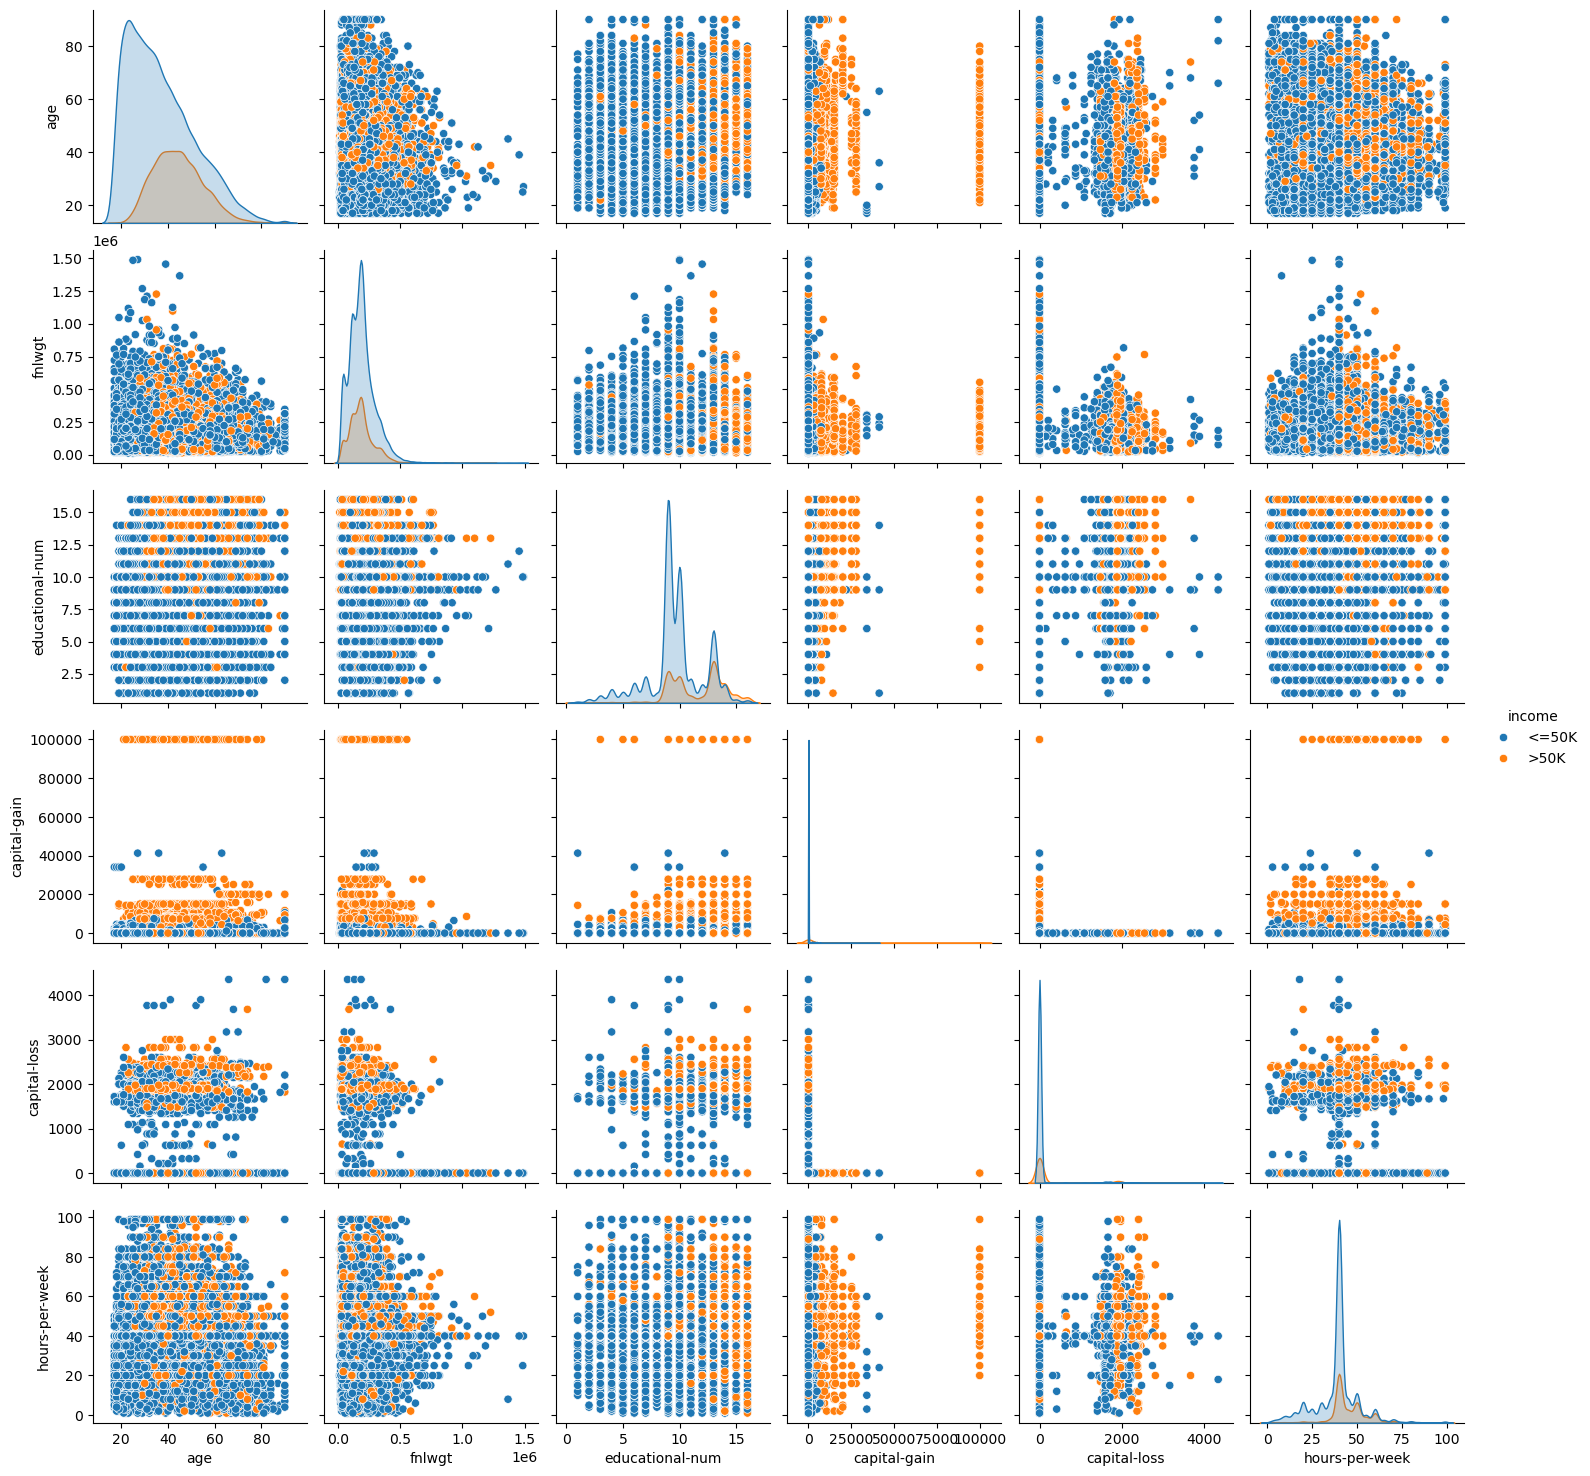

In [24]:
sns.pairplot(adult_income, hue='income');

In [27]:
adult_income.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            16
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

## <font color=red>Q: Can I make barplots?

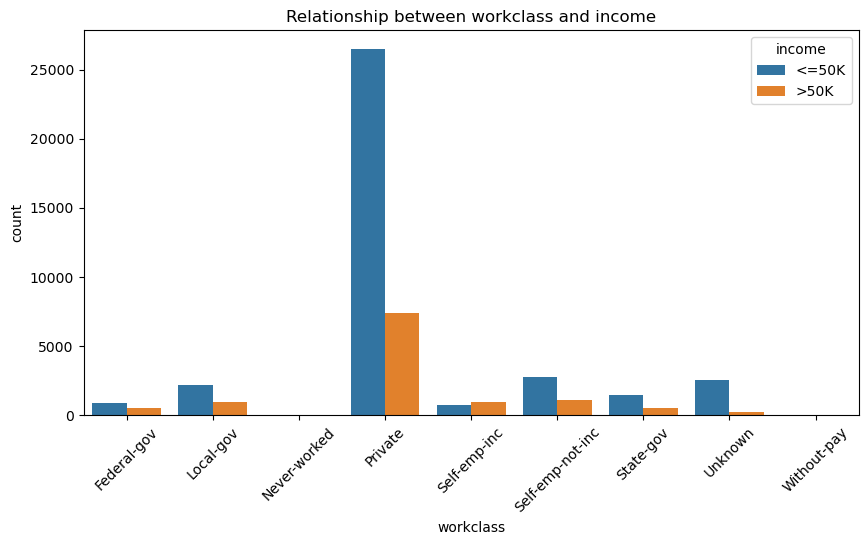

In [80]:
contingency_table = pd.crosstab(adult_income['workclass'], adult_income['income'])
df_for_plot = contingency_table.reset_index().melt(id_vars='workclass', var_name='income', value_name='count')
plt.figure(figsize=(10,5))
sns.barplot(x='workclass', y='count', hue='income', data=df_for_plot)
plt.xticks(rotation=45)
plt.title('Relationship between workclass and income')
plt.show()

<font color=red> marital-status?

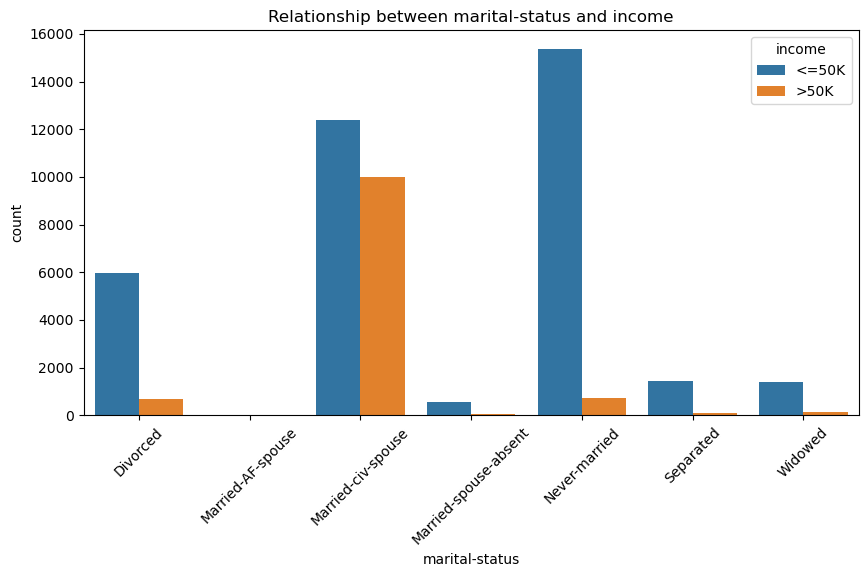

In [81]:
contingency_table = pd.crosstab(adult_income['marital-status'], adult_income['income'])
df_for_plot = contingency_table.reset_index().melt(id_vars='marital-status', var_name='income', value_name='count')
plt.figure(figsize=(10,5))
sns.barplot(x='marital-status', y='count', hue='income', data=df_for_plot)
plt.xticks(rotation=45)
plt.title('Relationship between marital-status and income')
plt.show()

<font color=red>occupation

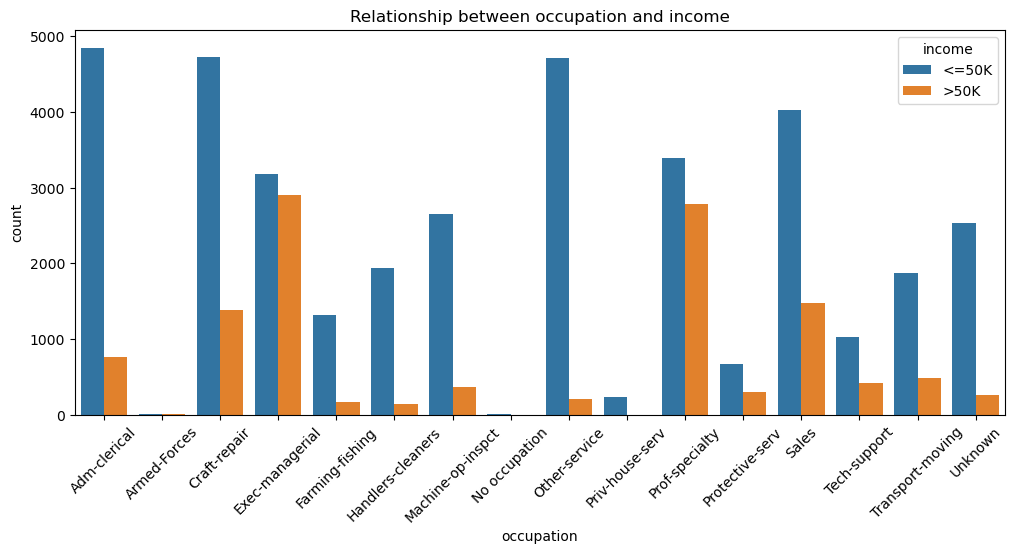

In [83]:
contingency_table = pd.crosstab(adult_income['occupation'], adult_income['income'])
df_for_plot = contingency_table.reset_index().melt(id_vars='occupation', var_name='income', value_name='count')
plt.figure(figsize=(12,5))
sns.barplot(x='occupation', y='count', hue='income', data=df_for_plot)
plt.xticks(rotation=45)
plt.title('Relationship between occupation and income')
plt.show()

relationship

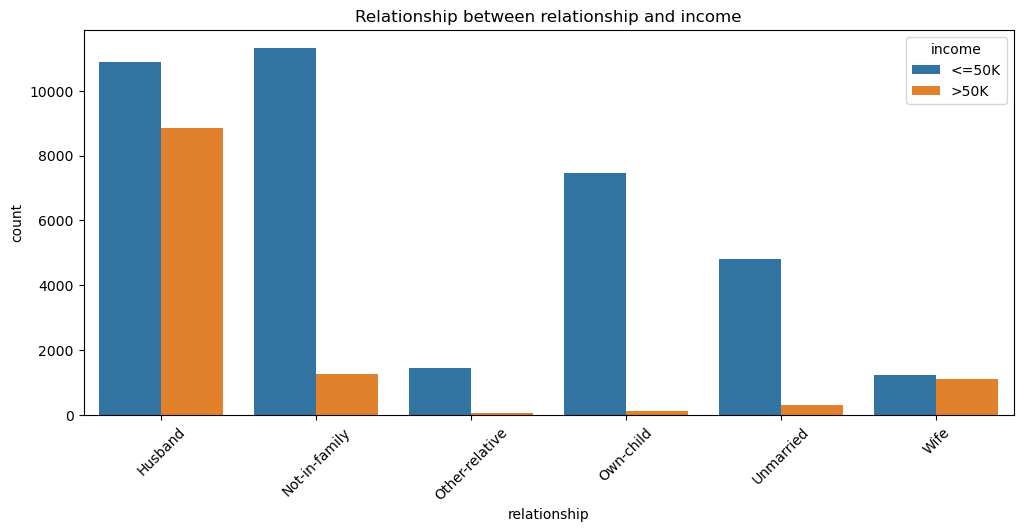

In [84]:
contingency_table = pd.crosstab(adult_income['relationship'], adult_income['income'])
df_for_plot = contingency_table.reset_index().melt(id_vars='relationship', var_name='income', value_name='count')
plt.figure(figsize=(12,5))
sns.barplot(x='relationship', y='count', hue='income', data=df_for_plot)
plt.xticks(rotation=45)
plt.title('Relationship between relationship and income')
plt.show()

race

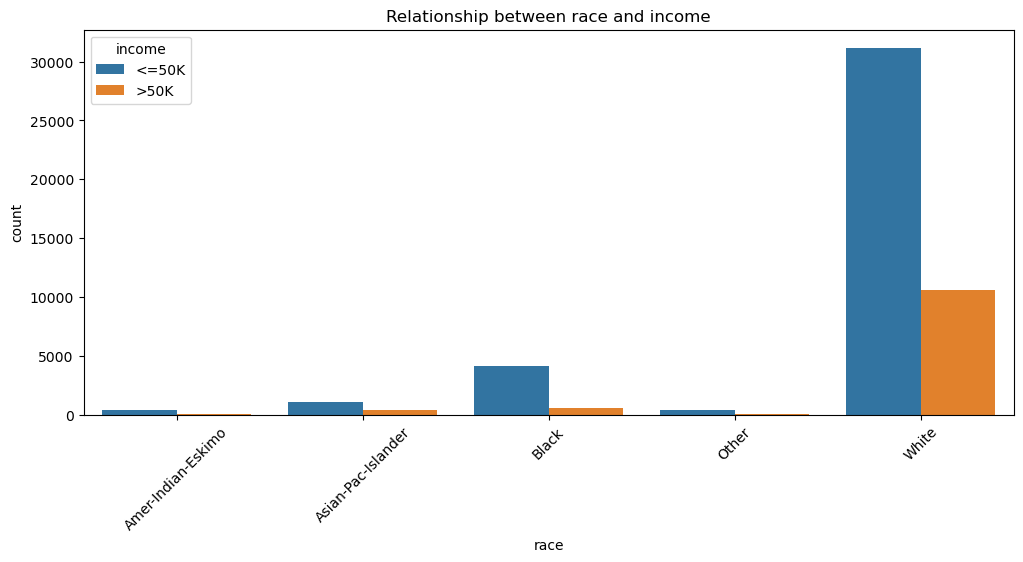

In [85]:
contingency_table = pd.crosstab(adult_income['race'], adult_income['income'])
df_for_plot = contingency_table.reset_index().melt(id_vars='race', var_name='income', value_name='count')
plt.figure(figsize=(12,5))
sns.barplot(x='race', y='count', hue='income', data=df_for_plot)
plt.xticks(rotation=45)
plt.title('Relationship between race and income')
plt.show()

## <font color=red>Q: Can I see any correlations?

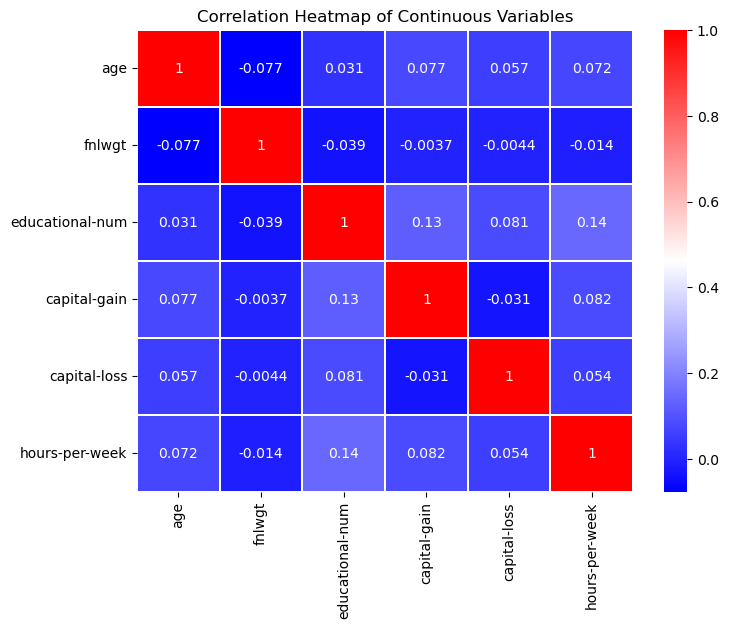

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(adult_income.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":10})
_ = plt.title('Correlation Heatmap of Continuous Variables')

no obvious correlation found.

## <font color=red>Q: Looking at the plots, what are some insights I can make?

<font color=red> from the scatterplots, we can conclude that:
1. capital-gain is the best variable can separate the income >50k and income <= 50k, which has clear boundary.
2. if the capital-gain between 10000 to 30000, the income >50k, if the  capital-gain = 100000, income >50k, this is obvious.
3. capital-gain have no obvious relationship with age or housr-per-week, but have kind of relationship with fnlwgt and education-num. most income>50k with fnlwgt < 0.75e6 and education-num > 7.

<font color=red> from the barplots, we can conclude that:
1. most samples in the dataset come from private workclass, and in private class, the percentage of income >50k is only 25%-30%. the class with highest percentage of income >50k is self-emp-inc, more than 50%.
2. the marital status with highest percentage of income >50k is married-civ-spouse, nearly 50%. that's interesting.
3. the occupation with highest percentage of income >50k are Exec-managerial and Prof-specialty, nearly 50%. this make sense. the Armed-Forces data is too few to see any trend.
5. for relationship in family, wife's percentage of income >50k is little bit higher than husband, that's really exciting, means women have been treated as fair as men. but the dataset may need more data from women to confirm this.
6. for race, most samples come from white, the percentage of income >50k is roughly 30%. other races are much lower, but too few data to support this.

<font color=red> the heatmap show no obvious corrlation.